In [1]:
%pylab inline

import re
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import statsmodels as sm
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest
from matplotlib.colors import ListedColormap

Populating the interactive namespace from numpy and matplotlib


In [2]:
def plotData(x, y ,color):
    xMap = assignIDs(x)
    xAsInts = np.array([xMap[i] for i in x])

    pearR = np.corrcoef(xAsInts,y)[1,0]
    A = np.vstack([xAsInts,np.ones(len(xAsInts))]).T
    m,c = np.linalg.lstsq(A,np.array(y))[0]

    plt.scatter(xAsInts,y,label='Data '+color,color=color)
    plt.plot(xAsInts,xAsInts*m+c,color=color,
             label="Fit %6s, r = %6.2e"%(color,pearR))
    plt.xticks(xMap.values(),xMap.keys())
    plt.legend(loc=3)

In [3]:
#Get Description Statistics of 2 dataframe
def getdesc(df2011, df2014, T):
    
    MEAN_ALL_RATE_11 = round(df2011[df2011[T] != 0][T].mean(),2)
    MEAN_ALL_RATE_14 = round(df2014[df2014[T] != 0][T].mean(),2)

    MEDIAN_ALL_RATE_11 = round(np.median(np.sort([df2011[T].unique()]), axis=1)[0], 2)
    MEDIAN_ALL_RATE_14 = round(np.median(np.sort([df2014[T].unique()]), axis=1)[0], 2)
    
    MODE_ALL_RATE_11 = round(df2011[df2011[T] != 0][T].mode().iloc[0], 2)
    MODE_ALL_RATE_14 = round(df2014[df2014[T] != 0][T].mode().iloc[0], 2)
    
    SD_ALL_RATE_11 = round(np.std(df2011[df2011[T] != 0][T]),2)
    SD_ALL_RATE_14 = round(np.std(df2014[df2014[T] != 0][T]),2)
    
    YEAR = [2011, 2014]
    MEAN = [MEAN_ALL_RATE_11, MEAN_ALL_RATE_14]
    MEDIAN = [MEDIAN_ALL_RATE_11, MEDIAN_ALL_RATE_14]
    MODE = [MODE_ALL_RATE_11, MODE_ALL_RATE_14]
    SD = [SD_ALL_RATE_11, SD_ALL_RATE_14]
    
    desc_data = pd.DataFrame({'YEAR' : YEAR,
                            'MEAN' : MEAN,
                            'MEDIAN' : MEDIAN,
                            'MODE' : MODE,
                             'SD': SD})

    return desc_data[['YEAR', 'MEAN', 'MEDIAN', 'MODE', 'SD']]

In [4]:
#Get State Code From State Name
def getStateCode(statename):
    data = pd.read_csv('data/state.txt')
    dfstate = data.loc[data['STATENAME'] == statename]
    
    return dfstate.ST.values

In [5]:
#Plot Time Serices Data
def plotTimeseries(acgr2011, acgr2014, State):
    TA = [2011, 2014]

    A1 = [np.mean(acgr2011.ALL_RATE), np.mean(acgr2014.ALL_RATE)]

    A2 = [np.mean(acgr2011.MAM_RATIO), np.mean(acgr2014.MAM_RATIO)]
    A3 = [np.mean(acgr2011.MAS_RATIO), np.mean(acgr2014.MAS_RATIO)]

    A4 = [np.mean(acgr2011.MBL_RATIO), np.mean(acgr2014.MBL_RATIO)]
    A5 = [np.mean(acgr2011.MHI_RATIO), np.mean(acgr2014.MHI_RATIO)]

    A6 = [np.mean(acgr2011.MTR_RATIO), np.mean(acgr2014.MTR_RATIO)]
    A7 = [np.mean(acgr2011.MWH_RATIO), np.mean(acgr2014.MWH_RATIO)]

    A8 = [np.mean(acgr2011.CWD_RATIO), np.mean(acgr2014.CWD_RATIO)]
    A9 = [np.mean(acgr2011.ECD_RATIO), np.mean(acgr2014.ECD_RATIO)]
    A10 = [np.mean(acgr2011.LEP_RATIO), np.mean(acgr2014.LEP_RATIO)]

    A11 = [np.mean(acgr2011.ALL_MTH_PCT), np.mean(acgr2014.ALL_MTH_PCT)]
    A12 = [np.mean(acgr2011.ALL_RLA_PCT), np.mean(acgr2014.ALL_RLA_PCT)]

    A15 = [np.mean(acgr2011.CHILD_RATIO), np.mean(acgr2014.CHILD_RATIO)]
    A16 = [np.mean(acgr2011.POVERTY_RATIO), np.mean(acgr2014.POVERTY_RATIO)]

    fig, ax = plt.subplots(2, 3, figsize=(25, 10))

    ax[0,0].plot(TA, A1, 'b--*', label='Cohort Rate')
    ax[0,0].plot(TA, A2, 'g-*', label='% of American Indian/Alaska Native students')
    ax[0,0].plot(TA, A3, 'r-*', label='% of Asian/Pacific Islander students')
    ax[0,0].set_title(State)
    legend = ax[0,0].legend()

    ax[0,1].plot(TA, A1, 'b--*', label='Cohort Rate')
    ax[0,1].plot(TA, A4, 'g-*', label='% of Black students')
    ax[0,1].plot(TA, A5, 'r-*', label='% of Hispanic students')
    ax[0,1].set_title(State)
    legend = ax[0,1].legend()

    ax[0,2].plot(TA, A1, 'b--*', label='Cohort Rate')
    ax[0,2].plot(TA, A6, 'g-*', label='% of Two or More Races')
    ax[0,2].plot(TA, A7, 'r-*', label='% of White students')
    ax[0,2].set_title(State)
    legend = ax[0,2].legend()

    ax[1,0].plot(TA, A1, 'b--*', label='Cohort Rate')
    ax[1,0].plot(TA, A8, 'g-*', label='% of students with disabilities')
    ax[1,0].plot(TA, A10, 'r-*', label='% of Limited English proficient students')
    ax[1,0].set_title(State)
    legend = ax[1,0].legend()

    ax[1,1].plot(TA, A1, 'b--*', label='Cohort Rate')
    ax[1,1].plot(TA, A11, 'g-*', label='% of students proficient in Math')
    ax[1,1].plot(TA, A12, 'r-*', label='% of students proficient in Reading/Language Arts')
    ax[1,1].set_title(State)
    legend = ax[1,1].legend()

    ax[1,2].plot(TA, A1, 'b--*', label='Cohort Rate')
    ax[1,2].plot(TA, A15, 'g-*', label='% of Child Population')
    ax[1,2].plot(TA, A16, 'r-*', label='% of Child Population In Poverty')
    ax[1,2].set_title(State)
    legend = ax[1,2].legend()

    plt.xticks([2011, 2014])

    plt.show()

Get going by asking the following questions and looking for the answers with some code and plots:

1. Can you count something interesting?

2. Can you find some trends (high, low, increase, decrease, anomalies)?

3. Can you make a bar plot or a histogram?

4. Can you compare two related quantities?

5. Can you make a scatterplot?

6. Can you make a time-series plot?

#### Having made these plots, what are some insights you get from them? Do you see any correlations? Is there a hypothesis you would like to investigate further? What other questions do they lead you to ask?

By now you’ve asked a bunch of questions, and found some neat insights. Is there an interesting narrative, a way of presenting the insights using text and plots from the above, that tells a compelling story? As you work out this story, what are some other trends/relationships you think will make it more complete?

Submission Requirements: Submit links to a Github repository containing a Jupyter notebook. The notebook should contain:

1. The questions you asked
2. The trends you investigated
3. The resulting visualizations and conclusions.

In [6]:
# Get the clean regulatory adjusted cohort graduation rate for all district
acgr2011 = pd.read_csv("data/high-school-dropout-dataset2011.csv")
acgr2014 = pd.read_csv("data/high-school-dropout-dataset2014.csv")

# Add the 'YEAR' Column
acgr2011['YEAR'] = 2011
acgr2014['YEAR'] = 2014

### Q1: How the graduation rate looks like for all students in 2011 & 2014?

In [7]:
print(getdesc(acgr2011, acgr2014, 'ALL_RATE'))

   YEAR   MEAN  MEDIAN  MODE     SD
0  2011  84.52    51.0    92  12.29
1  2014  86.43    52.0    90  11.70


In [8]:
acgrBySt2011 = round(acgr2011.groupby(['STATE'], as_index=False).mean(),2)
acgrBySt2011 = acgrBySt2011.sort_values('ALL_RATE')
print(acgrBySt2011.head(5)[['STATE', 'ALL_RATE']])
print(acgrBySt2011.tail(5)[['STATE', 'ALL_RATE']])

                   STATE  ALL_RATE
8   DISTRICT OF COLUMBIA     54.00
1                 ALASKA     60.62
34                OREGON     71.20
9                FLORIDA     71.81
26                NEVADA     72.62
           STATE  ALL_RATE
40         TEXAS     89.03
35  PENNSYLVANIA     89.26
39     TENNESSEE     90.26
33          OHIO     90.70
46     WISCONSIN     90.79


In [9]:
acgrBySt2014 = round(acgr2014.groupby(['STATE'], as_index=False).mean(),2)
acgrBySt2014 = acgrBySt2014.sort_values('ALL_RATE')
print(acgrBySt2014.head(5)[['STATE', 'ALL_RATE']])
print(acgrBySt2014.tail(5)[['STATE', 'ALL_RATE']])

                   STATE  ALL_RATE
8   DISTRICT OF COLUMBIA     66.00
1                 ALASKA     68.26
30            NEW MEXICO     72.91
36                OREGON     74.03
9                FLORIDA     76.49
         STATE  ALL_RATE
34        OHIO     90.67
29  NEW JERSEY     90.72
14     INDIANA     90.90
48   WISCONSIN     91.24
17    KENTUCKY     91.46


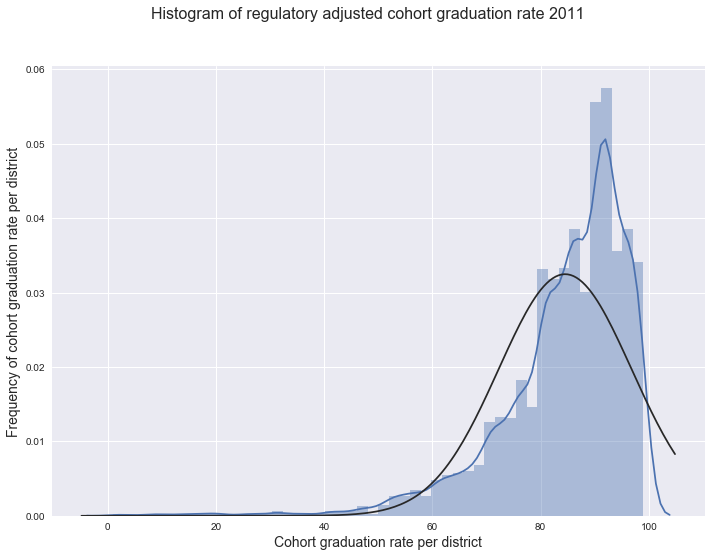

In [10]:
from scipy.stats import norm

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.distplot(acgr2011['ALL_RATE'], fit=norm, kde=True)
#fig = sns.distplot(acgr2011['ALL_RATE'], fit=norm, kde=True)

fig.suptitle("Histogram of regulatory adjusted cohort graduation rate 2011", fontsize = 16)

plt.xlabel('Cohort graduation rate per district', fontsize=14)
plt.ylabel('Frequency of cohort graduation rate per district', fontsize=14)

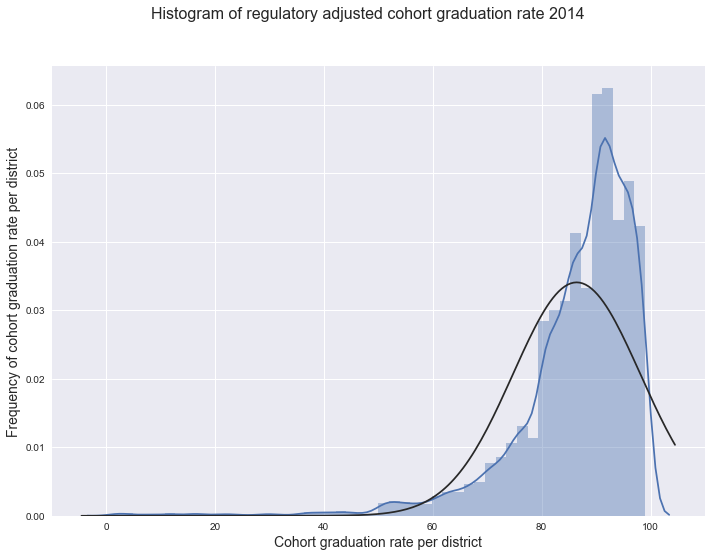

In [11]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.distplot(acgr2014['ALL_RATE'], fit=norm, kde=True)
#fig = sns.distplot(acgr2014['ALL_RATE'], fit=norm, kde=True)

fig.suptitle("Histogram of regulatory adjusted cohort graduation rate 2014", fontsize = 16)

plt.xlabel('Cohort graduation rate per district', fontsize=14)
plt.ylabel('Frequency of cohort graduation rate per district', fontsize=14)

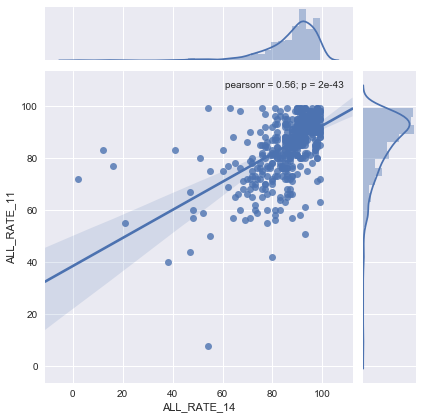

In [12]:
dfcomb1 = pd.merge(acgr2011, acgr2014, how='inner', on= ['LEAID'], left_index=False, right_index=False, sort=True, 
         suffixes=('_11', '_14'))
dfcomb2 = dfcomb1[['ALL_RATE_11','ALL_RATE_14']]

dftest = dfcomb2.take(np.random.permutation(len(dfcomb2))[:500])

#a4_dims = (11.7, 8.27)
#fig, ax = pyplot.subplots(figsize=a4_dims)
sns.jointplot(x="ALL_RATE_14", y="ALL_RATE_11", data=dftest, kind="reg");

In [13]:
frames = [acgr2011, acgr2014]

tempDf = pd.concat(frames)

tempComb = tempDf[['YEAR', 'ALL_RATE', 'MAM_RATIO', 'MAS_RATIO', 'MBL_RATIO', 'MHI_RATIO', 'MWH_RATIO',
                   'MTR_RATIO', 'CWD_RATIO', 'ECD_RATIO', 'LEP_RATIO', 'ALL_MTH_PCT', 'ALL_RLA_PCT',
                   'CHARTER_SCHOOL_RATIO', 'PUBLIC_SCHOOL_RATIO', 'FREE_AND_REDUCED_LUNCH_RATIO', 
                   'SECONDARY_TEACHERS_RATIO', 'SECONDARY_COUNSELORS_RATIO', 'CHILD_RATIO', 'POVERTY_RATIO']]

acgrComb = tempComb.rename(index=str, columns={
            'ALL_RATE': '% of students graduated', 'MAM_RATIO': '% Appeared - American Indian', 
            'MAS_RATIO': '% Appeared - Asian', 'MBL_RATIO': '% Appeared - Black',
            'MHI_RATIO': '% Appeared - Hispanic', 'MWH_RATIO': '% Appeared - White',
            'MTR_RATIO': '% Appeared - Two or More Races', 'CWD_RATIO': '% Appeared - Children with disabilities',
            'ECD_RATIO': '% Appeared - Economically disadvantaged', 'LEP_RATIO': '% Appeared - Limited English proficient',
            'ALL_MTH_PCT': '% Proficient - Math', 'ALL_RLA_PCT': '% Proficient - ELA',
            'CHARTER_SCHOOL_RATIO': '% of Charter School', 'PUBLIC_SCHOOL_RATIO': '% Public School',
            'FREE_AND_REDUCED_LUNCH_RATIO': '% of Students on free/reduced lunch', 'SECONDARY_TEACHERS_RATIO': '% of secondary teachers',
            'SECONDARY_COUNSELORS_RATIO': '% of secondary counselors',
            'CHILD_RATIO': '% of Children', 'POVERTY_RATIO': '% of Children under poverty'
            })
    
acgrByYr = round(acgrComb.groupby(['YEAR'], as_index=False).mean(),2)

acgr = acgrByYr.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]].T
acgr = acgr.rename(index=str, columns={0: 2011, 1: 2014})
acgr

,2011,2014
% of students graduated,84.52,86.43
% Appeared - American Indian,1.96,2.65
% Appeared - Asian,1.89,1.96
% Appeared - Black,8.32,7.74
% Appeared - Hispanic,10.61,11.71
% Appeared - White,75.79,73.98
% Appeared - Two or More Races,1.20,1.81
% Appeared - Children with disabilities,13.33,12.67
% Appeared - Economically disadvantaged,40.50,43.86
% Appeared - Limited English proficient,2.67,2.76


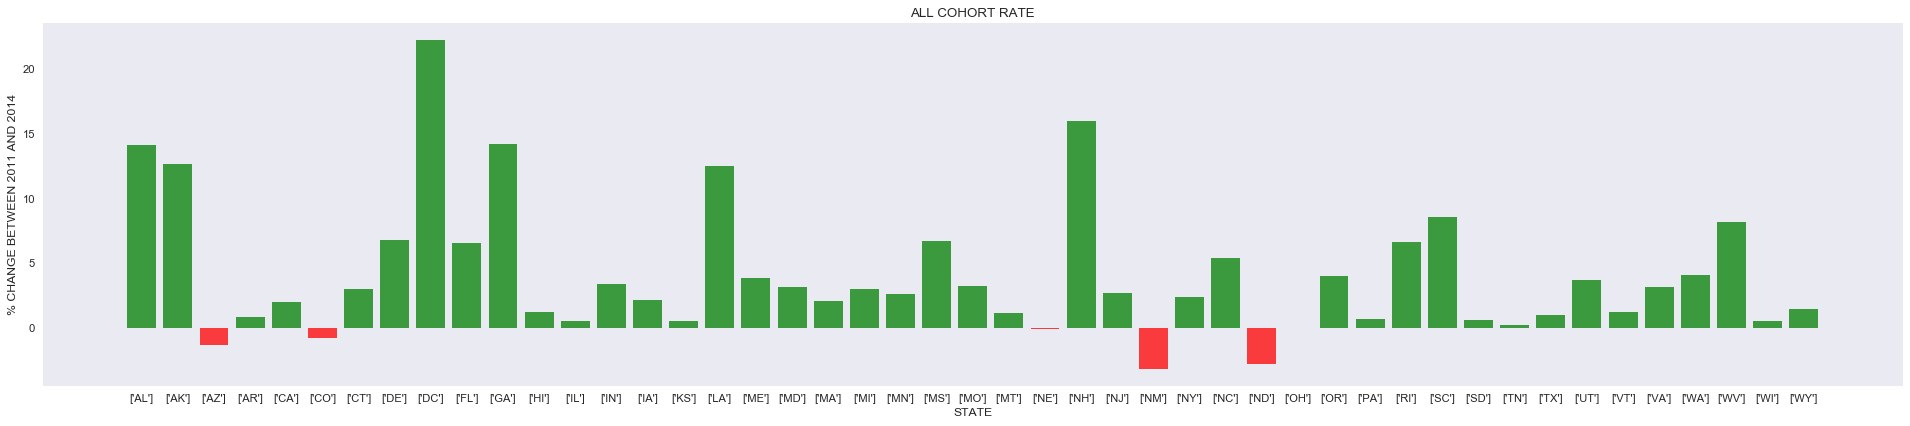

In [14]:
temp11 = acgr2011[['STATE', 'ALL_RATE']]
temp11 = temp11.groupby(['STATE'], as_index=False).mean()

temp14 = acgr2014[['STATE', 'ALL_RATE']]
temp14 = temp14.groupby(['STATE'], as_index=False).mean()

dfcomb = pd.merge(temp11, temp14, how='inner', on= ['STATE'], left_index=False, right_index=False, sort=True, 
         suffixes=('_11', '_14'))

dfcomb['Change'] = ((dfcomb['ALL_RATE_14'] - dfcomb['ALL_RATE_11']) / dfcomb['ALL_RATE_11']) * 100
dfcomb['Index'] = dfcomb['STATE'].map(getStateCode) #range(1, len(dfcomb) + 1)
dfcomb['positive'] = dfcomb['Change'] > 0
dfcomb['STATE'].map(getStateCode)
    
plt.figure(num=None, figsize=(30, 6), dpi=80, facecolor='w', edgecolor='k')

objects = dfcomb['Index']
y_pos = np.arange(len(objects))
performance = dfcomb['Change']
 
plt.bar(y_pos, performance, align='center', alpha=0.75, color=dfcomb.positive.map({True: 'g', False: 'r'}))
plt.xticks(y_pos, objects)
plt.xlabel('STATE')
plt.ylabel('% CHANGE BETWEEN 2011 AND 2014')
plt.title('ALL COHORT RATE')
plt.grid()

plt.show()

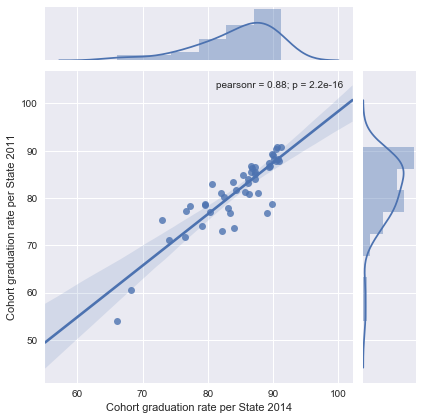

In [15]:
dfcomb = dfcomb.rename(columns={"ALL_RATE_14": "Cohort graduation rate per State 2014", "ALL_RATE_11": "Cohort graduation rate per State 2011"})
fig = sns.jointplot(x="Cohort graduation rate per State 2014", y="Cohort graduation rate per State 2011", data=dfcomb, kind="reg");

In [16]:
dfcomb.sort_values('Change').head(5)

,STATE,Cohort graduation rate per State 2011,Cohort graduation rate per State 2014,Change,Index,positive
28,NEW MEXICO,75.314607,72.906977,-3.196764,[NM],False
31,NORTH DAKOTA,82.930070,80.606061,-2.802372,[ND],False
2,ARIZONA,78.309735,77.283688,-1.310241,[AZ],False
5,COLORADO,77.288136,76.676136,-0.791841,[CO],False
25,NEBRASKA,86.681452,86.580247,-0.116755,[NE],False


In [17]:
dfcomb.sort_values('Change').tail(5)

,STATE,Cohort graduation rate per State 2011,Cohort graduation rate per State 2014,Change,Index,positive
1,ALASKA,60.622642,68.264151,12.605042,[AK],True
0,ALABAMA,78.734848,89.864662,14.135816,[AL],True
10,GEORGIA,73.569832,84.000000,14.177234,[GA],True
26,NEW HAMPSHIRE,76.862745,89.148649,15.984211,[NH],True
8,DISTRICT OF COLUMBIA,54.000000,66.000000,22.222222,[DC],True


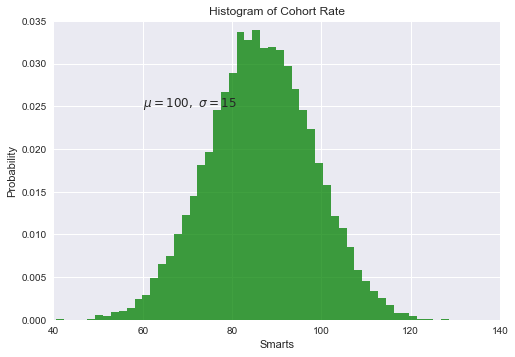

In [18]:
mu = np.mean(acgr2014.ALL_RATE)
sigma = np.std(acgr2014.ALL_RATE)
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of Cohort Rate')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 140, 0, 0.035])
plt.grid(True)
plt.show()

### Q2: Which are the major racial and ethnic groups contributing towards the overall graduation rate?

In [19]:
print(getdesc(acgr2011, acgr2014, 'MAM_RATIO'))

   YEAR  MEAN  MEDIAN  MODE     SD
0  2011  6.80    43.0   1.0  16.81
1  2014  8.95    46.0   1.0  18.03


In [20]:
print(getdesc(acgr2011, acgr2014, 'MAS_RATIO'))

   YEAR  MEAN  MEDIAN  MODE    SD
0  2011  3.87    28.0   1.0  5.86
1  2014  3.93    28.5   1.0  5.69


In [21]:
print(getdesc(acgr2011, acgr2014, 'MBL_RATIO'))

   YEAR   MEAN  MEDIAN  MODE     SD
0  2011  13.50    50.0   1.0  20.73
1  2014  12.49    50.0   1.0  19.41


In [22]:
print(getdesc(acgr2011, acgr2014, 'MHI_RATIO'))

   YEAR   MEAN  MEDIAN  MODE     SD
0  2011  14.24    50.0   2.0  20.04
1  2014  14.99    50.0   2.0  20.34


In [23]:
print(getdesc(acgr2011, acgr2014, 'MWH_RATIO'))

   YEAR   MEAN  MEDIAN   MODE     SD
0  2011  76.87    50.0  100.0  25.37
1  2014  75.02    50.0  100.0  25.43


### Q3: How each major racial and ethnic groups are contributing towards the high graduation rate?

### Q4: How the major racial and ethnic groups are distributed in compariosn with 2011 and 2014?

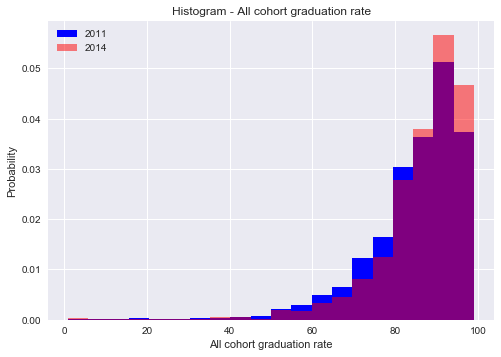

In [24]:
plt.hist(acgr2011['ALL_RATE'], bins=20, histtype='bar', normed=True, color='b', label='2011')
plt.hist(acgr2014['ALL_RATE'], bins=20, histtype='bar', normed=True, color='r', alpha=0.5, label='2014')
plt.title("Histogram - All cohort graduation rate")
plt.xlabel("All cohort graduation rate")
plt.ylabel("Probability")
plt.legend()
plt.show()

In [37]:
acgr2014.columns

Index(['YEAR', 'STATE', 'LEAID', 'ALL_COHORT', 'ALL_RATE', 'MAM_RATE',
       'MAS_RATE', 'MBL_RATE', 'MHI_RATE', 'MTR_RATE', 'MWH_RATE', 'CWD_RATE',
       'ECD_RATE', 'LEP_RATE', 'MAM_RATIO', 'MAS_RATIO', 'MBL_RATIO',
       'MHI_RATIO', 'MTR_RATIO', 'MWH_RATIO', 'CWD_RATIO', 'ECD_RATIO',
       'LEP_RATIO', 'ALL_MTH_PCT', 'ALL_RLA_PCT', 'CHARTER_SCHOOL_RATIO',
       'PUBLIC_SCHOOL_RATIO', 'FREE_AND_REDUCED_LUNCH_RATIO',
       'SECONDARY_TEACHERS_RATIO', 'SECONDARY_COUNSELORS_RATIO', 'CHILD_RATIO',
       'POVERTY_RATIO'],
      dtype='object')

### Q5: How the major racial and ethnic groups are co-related with 2011 and 2014?

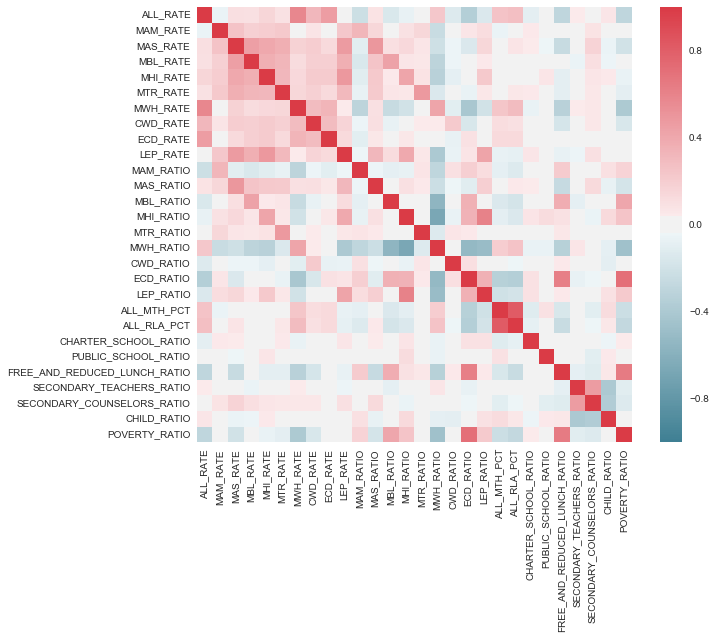

In [26]:
acgr2014r = acgr2014[['ALL_RATE', 'MAM_RATE',
       'MAS_RATE', 'MBL_RATE', 'MHI_RATE', 'MTR_RATE', 'MWH_RATE', 'CWD_RATE',
       'ECD_RATE', 'LEP_RATE', 'MAM_RATIO', 'MAS_RATIO', 'MBL_RATIO',
       'MHI_RATIO', 'MTR_RATIO', 'MWH_RATIO', 'CWD_RATIO', 'ECD_RATIO',
       'LEP_RATIO', 'ALL_MTH_PCT', 'ALL_RLA_PCT', 'CHARTER_SCHOOL_RATIO',
       'PUBLIC_SCHOOL_RATIO', 'FREE_AND_REDUCED_LUNCH_RATIO',
       'SECONDARY_TEACHERS_RATIO', 'SECONDARY_COUNSELORS_RATIO', 'CHILD_RATIO',
       'POVERTY_RATIO']]
    
fig, ax = plt.subplots(figsize=(10, 8))
corr = acgr2014r.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [27]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "10pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '100px'),
                        ('font-size', '10pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '70px', 'font-size': '9pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,ALL_RATE,MAM_RATE,MAS_RATE,MBL_RATE,MHI_RATE,MTR_RATE,MWH_RATE,CWD_RATE,ECD_RATE,LEP_RATE,MAM_RATIO,MAS_RATIO,MBL_RATIO,MHI_RATIO,MTR_RATIO,MWH_RATIO,CWD_RATIO,ECD_RATIO,LEP_RATIO,ALL_MTH_PCT,ALL_RLA_PCT,CHARTER_SCHOOL_RATIO,PUBLIC_SCHOOL_RATIO,FREE_AND_REDUCED_LUNCH_RATIO,SECONDARY_TEACHERS_RATIO,SECONDARY_COUNSELORS_RATIO,CHILD_RATIO,POVERTY_RATIO
ALL_RATE,1,-0.055,0.11,0.1,0.15,0.091,0.58,0.32,0.46,0.034,-0.22,0.081,-0.15,-0.076,-0.036,0.23,-0.13,-0.36,-0.14,0.26,0.28,-0.095,0.02,-0.29,0.043,0.017,0.064,-0.29
MAM_RATE,-0.055,1,0.25,0.19,0.2,0.22,-0.01,0.076,0.029,0.23,0.33,0.14,0.016,0.089,0.15,-0.24,-0.0081,0.07,0.12,-0.06,-0.037,0.048,-0.016,0.024,0.0095,0.08,0.00055,0.016
MAS_RATE,0.11,0.25,1,0.45,0.4,0.36,0.18,0.2,0.13,0.47,-0.11,0.5,0.11,0.14,0.067,-0.21,-0.054,-0.15,0.14,0.032,0.075,0.043,-0.039,-0.25,-0.033,0.17,-0.06,-0.2
MBL_RATE,0.1,0.19,0.45,1,0.36,0.33,0.12,0.19,0.19,0.37,-0.15,0.25,0.43,0.069,0.06,-0.31,-0.054,0.029,0.05,0.021,0.033,0.0006,-0.025,-0.0075,-0.056,0.11,-0.053,0.038
MHI_RATE,0.15,0.2,0.4,0.36,1,0.32,0.14,0.21,0.21,0.49,-0.11,0.23,0.05,0.42,0.086,-0.33,-0.087,-0.02,0.23,0.034,0.02,0.034,0.07,-0.096,-0.032,0.063,0.048,-0.065
MTR_RATE,0.091,0.22,0.36,0.33,0.32,1,0.15,0.18,0.13,0.3,-0.071,0.22,0.068,0.057,0.48,-0.14,-0.029,-0.068,0.061,0.033,0.061,0.047,-0.026,-0.1,-0.033,0.055,-0.03,-0.094
MWH_RATE,0.58,-0.01,0.18,0.12,0.14,0.15,1,0.29,0.33,0.04,-0.31,0.097,-0.25,-0.2,-0.027,0.41,-0.1,-0.42,-0.2,0.24,0.29,-0.066,-0.033,-0.33,0.042,0.057,-0.022,-0.39
CWD_RATE,0.32,0.076,0.2,0.19,0.21,0.18,0.29,1,0.29,0.16,-0.052,0.11,-0.072,0.0083,0.04,0.041,0.21,-0.16,-0.0068,0.11,0.098,-0.022,-0.025,-0.18,0.00072,0.059,0.033,-0.16
ECD_RATE,0.46,0.029,0.13,0.19,0.21,0.13,0.33,0.29,1,0.13,-0.11,0.059,0.032,0.059,0.027,-0.03,-0.076,0.087,0.011,0.13,0.13,-0.032,0.015,-0.0058,-0.012,0.018,0.028,0.0011
LEP_RATE,0.034,0.23,0.47,0.37,0.49,0.3,0.04,0.16,0.13,1,-0.042,0.31,0.12,0.4,0.061,-0.4,-0.063,0.078,0.43,-0.077,-0.081,0.064,0.014,-0.074,-0.048,0.097,0.038,-0.01


### Q6: How the most signifact racial and ethnic group is are spread in 2011 and 2014?

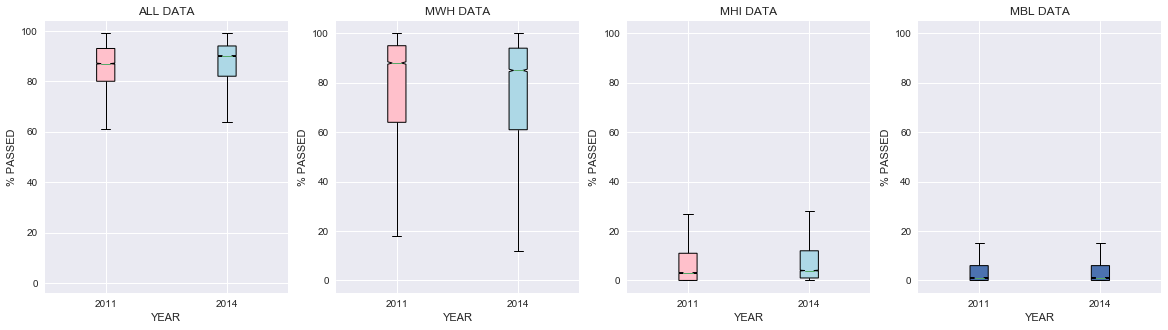

In [28]:
ALL_DATA = [acgr2011['ALL_RATE'].values.tolist(), acgr2014['ALL_RATE'].values.tolist()]
MWH_DATA = [acgr2011['MWH_RATIO'].values.tolist(), acgr2014['MWH_RATIO'].values.tolist()]
MHI_DATA = [acgr2011['MHI_RATIO'].values.tolist(), acgr2014['MHI_RATIO'].values.tolist()]
MBL_DATA = [acgr2011['MBL_RATIO'].values.tolist(), acgr2014['MBL_RATIO'].values.tolist()]

labels = ['2011', '2014']

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

# notch box plot
bplot1 = axes[0].boxplot(ALL_DATA,
                         notch=True,  # notch shape
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
axes[0].set_title('ALL DATA')

# notch shape box plot
bplot2 = axes[1].boxplot(MWH_DATA,
                         notch=True,  # notch shape
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
axes[1].set_title('MWH DATA')

# notch shape box plot
bplot3 = axes[2].boxplot(MHI_DATA,
                         notch=True,  # notch shape
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
axes[2].set_title('MHI DATA')

# notch shape box plot
bplot4 = axes[3].boxplot(MBL_DATA,
                         notch=True,  # notch shape
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
axes[3].set_title('MBL DATA')

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2, bplot3, bplot3):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xlabel('YEAR')
    ax.set_ylabel('% PASSED')

plt.show()

From my analysis of two year graduation data I can conclude that the 
overall graduation rate is driven by the following major racial and ethnic group.

1. White Students
2. Hispanic students
3. Black students

Now I want to investigate further with the following hypothesis:

##### NULL Hypethesis:
A population with more white students graduating is not going to improve the overall graduation rate 

##### Alternate Hypothesis:
A population with more white students graduating is going to improve the overall graduation rate

Not normal distribution
0.0


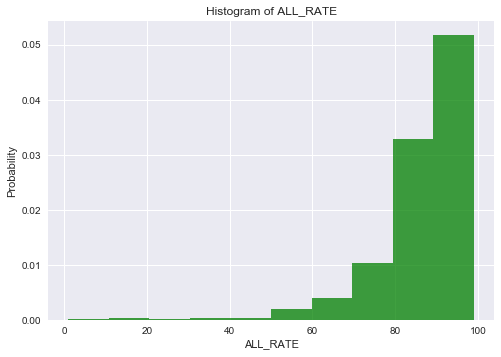

In [29]:
z,pval = stats.normaltest(acgr2014.ALL_RATE)

if(pval < 0.055):
    print("Not normal distribution")

print(pval)

n, bins, patches = plt.hist(acgr2014.ALL_RATE, 10, normed=1, facecolor='g', alpha=0.75)

plt.xlabel('ALL_RATE')
plt.ylabel('Probability')
plt.title('Histogram of ALL_RATE')
#plt.axis([96, 101, 0, 0.55])
plt.grid(True)
plt.show()

In [30]:
dftest = acgr2014r.take(np.random.permutation(len(acgr2014))[:200])

print("The mean cohort graduation rate of the sample is: ", round(dftest.ALL_RATE.mean(),2))
print("The standard deviation cohort graduation rate of the sample is: ", round(dftest.ALL_RATE.std(),2))

one_sample = stats.ttest_1samp(dftest.ALL_RATE, 84)
print("The t-statistic is ", one_sample[0], " and the p-value is ", one_sample[1])

The mean cohort graduation rate of the sample is:  85.9
The standard deviation cohort graduation rate of the sample is:  11.31
The t-statistic is  2.37602630085  and the p-value is  0.0184493831538


We are having a random sample, n = 200 is large enough for the CLT to appy so the distribution of sample means is approximately normal. The population SD is unknown, so a t-test is called with H<sub>0</sub> = 84.0 and H<sub>a</sub> > 84.0

The test result shows the test t-statistic as -0.2887 and P-value as 0.77308. With this P-value, 0.77308 > 0.05, there is sufficient evidence to accept H<sub>0</sub>, that is, there is sufficient evidence that the mean cohort graduation rate is 84.0

In [31]:
zstat, pval = ztest(dftest['ALL_RATE'], x2=None, value=84, alternative='two-sided', 
                    usevar='pooled', ddof=1.0)

print("The z-statistic is ", zstat, " and the p-value  is ", pval)

The z-statistic is  2.37602630085  and the p-value  is  0.0175002153749


In [32]:
#pd.scatter_matrix(acgr2014r, alpha=0.2, figsize=(6, 6), diagonal='kde')

#pd.scatter_matrix(acgr2014r, c = y, figsize = [8,8], s=150, marker='D')

(7622, 27) (7622, 1)
(2541, 27) (2541, 1)


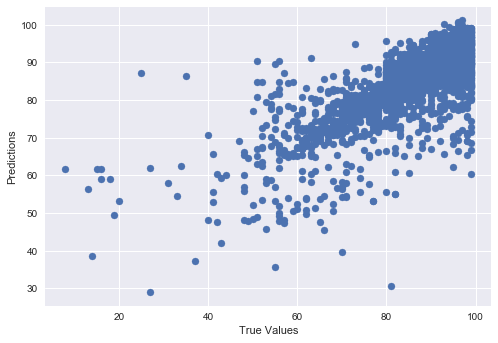

In [54]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

columns = ['MAM_RATE', 'MAS_RATE', 'MBL_RATE', 'MHI_RATE', 'MTR_RATE', 'MWH_RATE', 'CWD_RATE',
           'ECD_RATE', 'LEP_RATE', 'MAM_RATIO', 'MAS_RATIO', 'MBL_RATIO', 'MHI_RATIO', 'MTR_RATIO', 
           'MWH_RATIO', 'CWD_RATIO', 'ECD_RATIO', 'LEP_RATIO', 'ALL_MTH_PCT', 'ALL_RLA_PCT', 
           'CHARTER_SCHOOL_RATIO', 'PUBLIC_SCHOOL_RATIO', 'FREE_AND_REDUCED_LUNCH_RATIO',
           'SECONDARY_TEACHERS_RATIO', 'SECONDARY_COUNSELORS_RATIO', 'CHILD_RATIO','POVERTY_RATIO']

df = acgr2011[columns]
y = acgr2011[['ALL_RATE']]

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [55]:
print("Score:", model.score(X_test, y_test))

Score: 0.575844913485


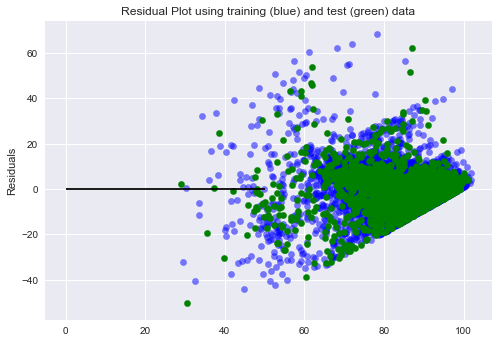

In [56]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')